### Importing libraries and files : ###

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

%matplotlib inline


In [81]:
df=pd.read_csv('online_shoppers_intention.csv')

In [82]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [84]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [85]:
len(df.columns)

18

In [86]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

In [87]:
len(df.columns)

15

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
categorical_columns=['Weekend','Revenue']
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])


Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [90]:

df['Month'] = df['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})


In [91]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [92]:
df.duplicated().value_counts()  #to see the count of duplicated rows

False    12157
True       173
Name: count, dtype: int64

In [93]:
# Use the `duplicated` function to identify duplicated rows
duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
print(duplicated_rows)

       Administrative_Duration  Informational_Duration  \
158                        0.0                     0.0   
159                        0.0                     0.0   
178                        0.0                     0.0   
330                        0.0                     0.0   
356                        0.0                     0.0   
...                        ...                     ...   
11939                      0.0                     0.0   
12159                      0.0                     0.0   
12180                      0.0                     0.0   
12185                      0.0                     0.0   
12301                      0.0                     0.0   

       ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
158                        0.0          0.2        0.2         0.0   
159                        0.0          0.2        0.2         0.0   
178                        0.0          0.2        0.2         0.0   
330                    

In [94]:
df.drop_duplicates(inplace=True)

In [95]:
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# DATA ANALYSIS


In [96]:
import pandas as pd

# Group the data by traffic type
grouped_data = df.groupby('TrafficType')

# Calculate average revenue per traffic type
average_revenue = grouped_data['Revenue'].mean()

# Calculate total revenue per traffic type
total_revenue = grouped_data['Revenue'].sum()

# Compare revenue across traffic types
revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})

# Print the revenue comparison
print(revenue_comparison)


             Average Revenue  Total Revenue
TrafficType                                
1                   0.110455            262
2                   0.216624            847
3                   0.090000            180
4                   0.155075            165
5                   0.215385             56
6                   0.119910             53
7                   0.300000             12
8                   0.277778             95
9                   0.097561              4
10                  0.200000             90
11                  0.190283             47
12                  0.000000              0
13                  0.060140             43
14                  0.153846              2
15                  0.000000              0
16                  0.333333              1
17                  0.000000              0
18                  0.000000              0
19                  0.058824              1
20                  0.259067             50


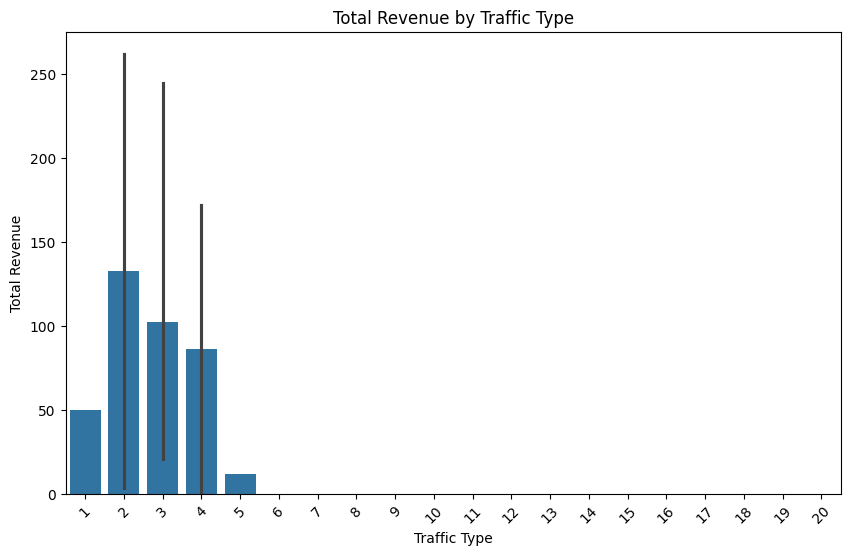

In [97]:
# Sort the revenue comparison dataframe in descending order based on the revenue metric
revenue_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Visualize the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_comparison, x=df['TrafficType'], y='Total Revenue')
plt.title('Total Revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



C:\Users\Povilas\AppData\Local\Temp\ipykernel_10116\2883767577.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=traffic_type_2_data, x=variable, palette='viridis')


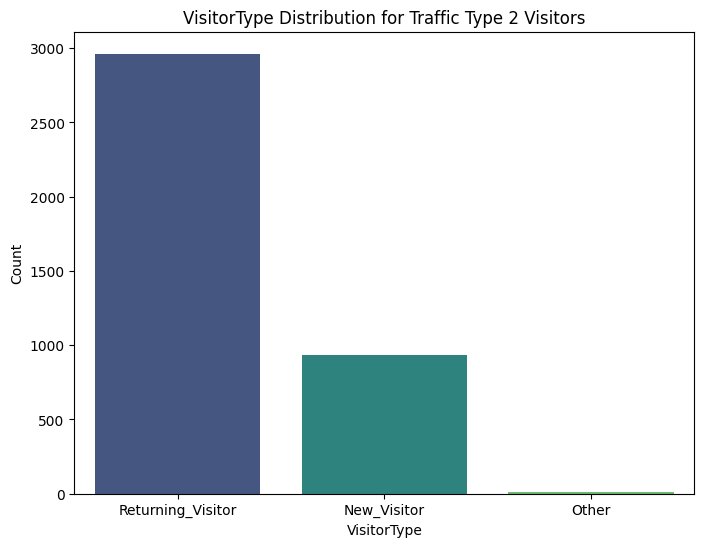

C:\Users\Povilas\AppData\Local\Temp\ipykernel_10116\2883767577.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=traffic_type_3_data, x=variable, palette='viridis')


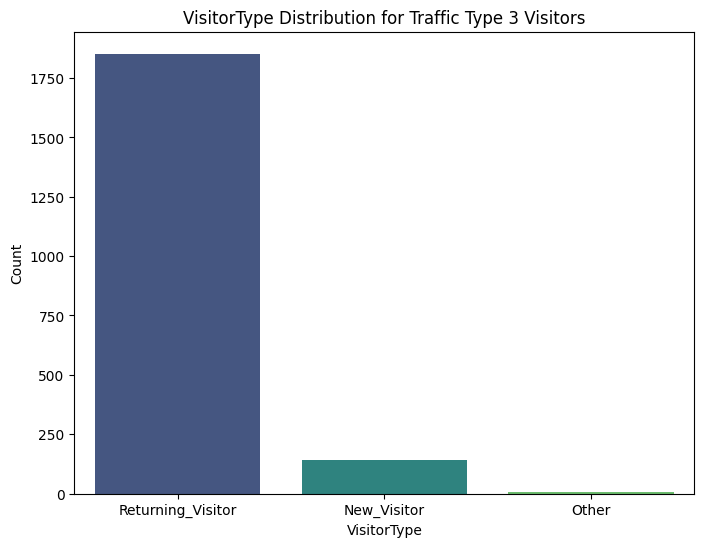

C:\Users\Povilas\AppData\Local\Temp\ipykernel_10116\2883767577.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=traffic_type_2_data, x=variable, palette='viridis')


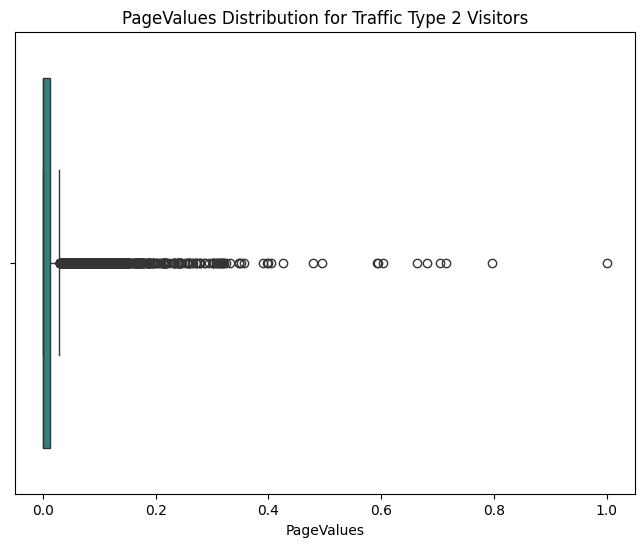

C:\Users\Povilas\AppData\Local\Temp\ipykernel_10116\2883767577.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=traffic_type_3_data, x=variable, palette='viridis')


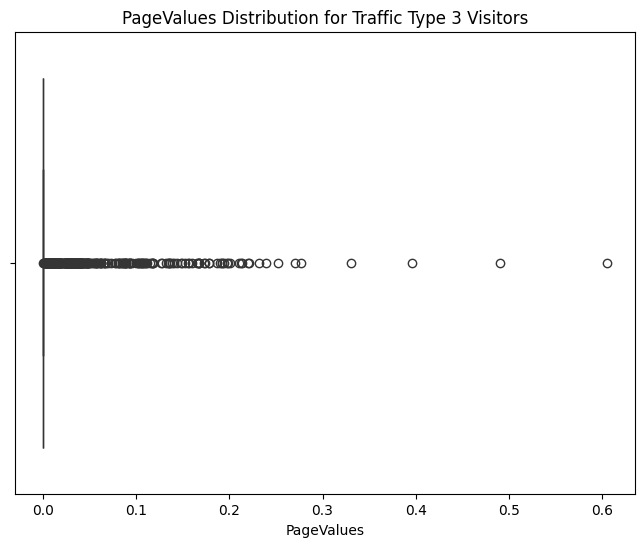

C:\Users\Povilas\AppData\Local\Temp\ipykernel_10116\2883767577.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=traffic_type_2_data, x=variable, palette='viridis')


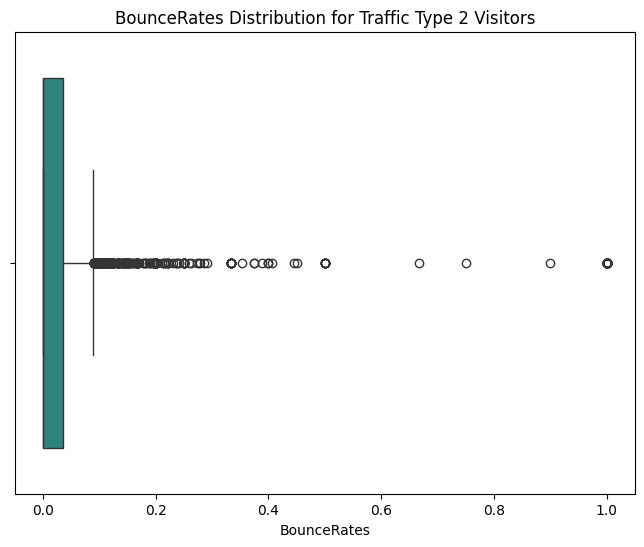

C:\Users\Povilas\AppData\Local\Temp\ipykernel_10116\2883767577.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=traffic_type_3_data, x=variable, palette='viridis')


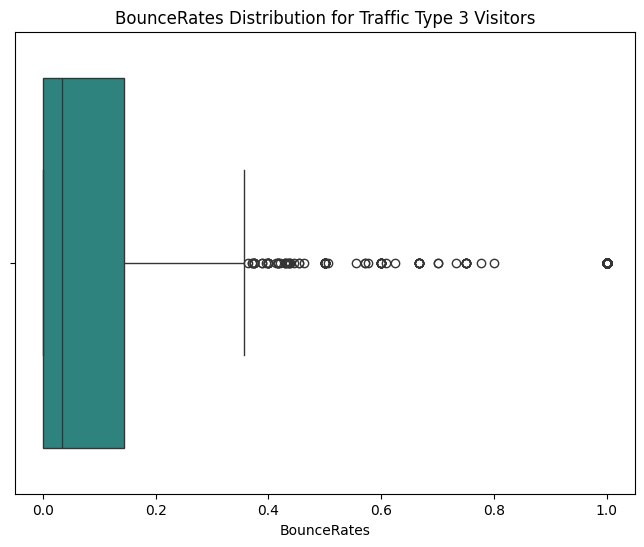

C:\Users\Povilas\AppData\Local\Temp\ipykernel_10116\2883767577.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=traffic_type_2_data, x=variable, palette='viridis')


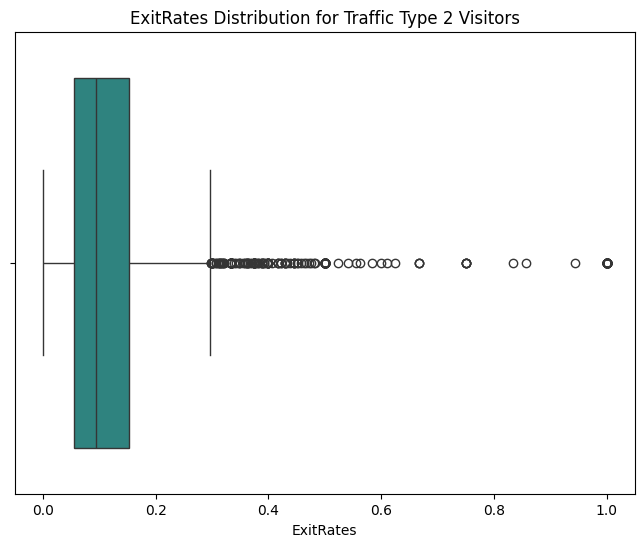

C:\Users\Povilas\AppData\Local\Temp\ipykernel_10116\2883767577.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=traffic_type_3_data, x=variable, palette='viridis')


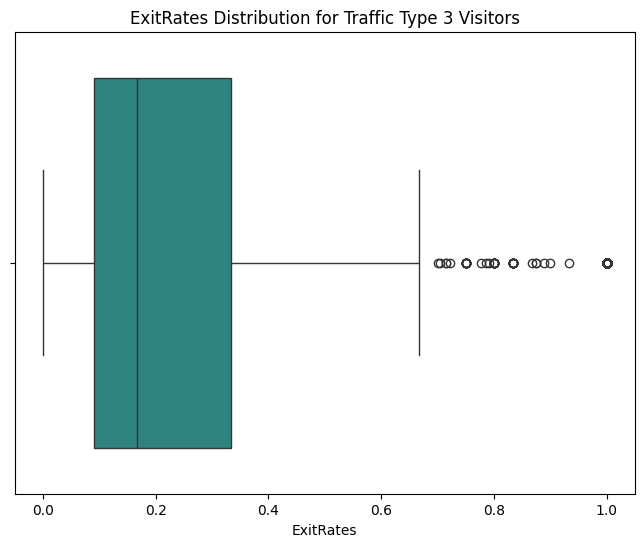

In [98]:


# Filter the dataset for Traffic Type 2 visitors
traffic_type_2_data = df[df['TrafficType'] == 2]

# Filter the dataset for Traffic Type 3 visitors
traffic_type_3_data = df[df['TrafficType'] == 3]

# Demographic analysis
demographic_variables = ['VisitorType']

for variable in demographic_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

# Behavioral analysis
behavioral_variables = ['PageValues', 'BounceRates', 'ExitRates']

for variable in behavioral_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.show()


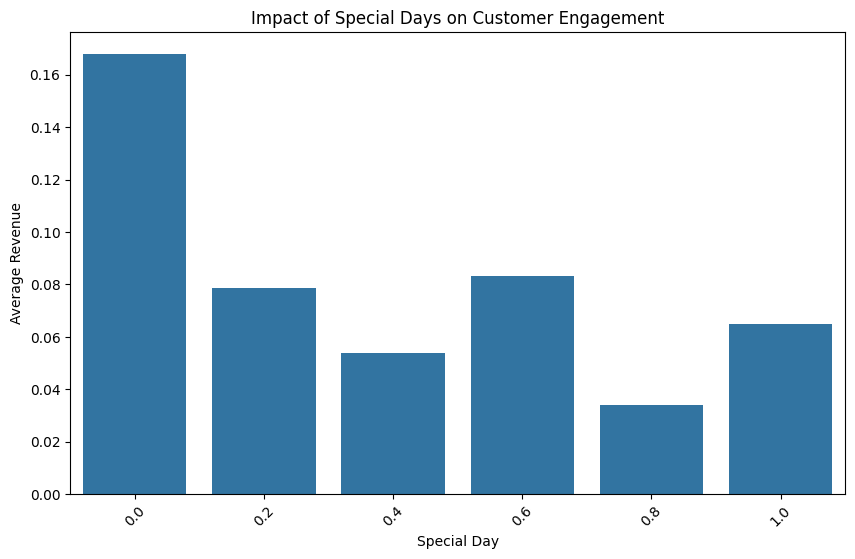

Special Days with the Highest Impact on Customer Engagement:
- 0.0: 0.16779692082111436
- 0.6: 0.0830945558739255
- 0.2: 0.07865168539325842


In [99]:


# Group the data by 'SpecialDay' and calculate the average revenue or visitor count
special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean()  # Replace 'Revenue' with the appropriate metric

# Sort the data in descending order based on the average revenue or visitor count
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Visualize the impact of special days on customer engagement
plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Impact of Special Days on Customer Engagement")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue" ) 
plt.xticks(rotation=45)
plt.show()

# Identify the special days with the highest impact on customer engagement
top_special_days = special_day_analysis.head(3)  # Replace '3' with the desired number of top special days

print("Special Days with the Highest Impact on Customer Engagement:")
for day, impact in top_special_days.items():
    print(f"- {day}: {impact}")


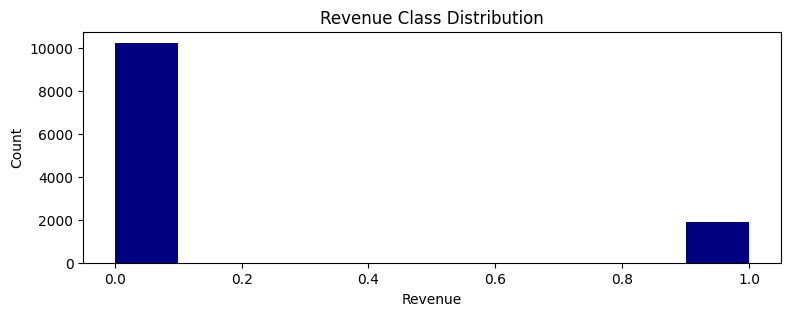

In [101]:
plt.figure(figsize=(9, 3))
plt.hist(df['Revenue'],color='navy')

plt.title('Revenue Class Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

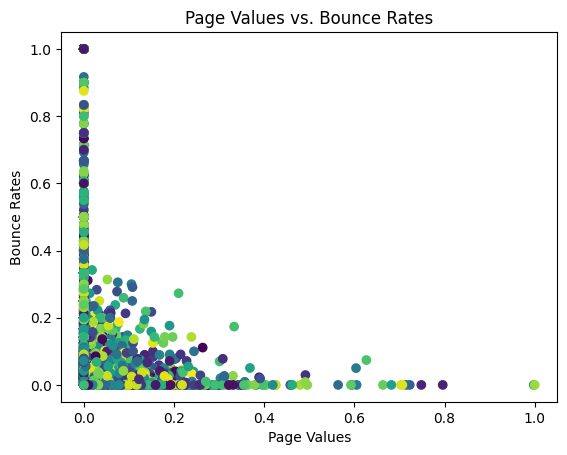

In [102]:
N=len(df)
colors = np.random.rand(N)
plt.scatter(df['PageValues'], df['BounceRates'],c=colors)
plt.title('Page Values vs. Bounce Rates')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()


In [103]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [104]:
df['Revenue'].value_counts()

Revenue
0    10249
1     1908
Name: count, dtype: int64

In [105]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [107]:
y_train.value_counts()

Revenue
0    8199
1    1526
Name: count, dtype: int64

In [108]:
y.value_counts()

Revenue
0    10249
1     1908
Name: count, dtype: int64

In [109]:
y_test.value_counts()

Revenue
0    2050
1     382
Name: count, dtype: int64

In [110]:
X_train.shape

(9725, 14)

In [111]:
X_test.shape

(2432, 14)

In [112]:
X_train[:10]

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2811,0.000000,0.000000,0.006888,0.078947,0.232456,0.000000,0.4,5,2,5,3,3,Returning_Visitor,0
4466,0.007473,0.000000,0.046246,0.027027,0.109234,0.015693,0.4,5,2,5,2,3,Returning_Visitor,0
10593,0.031543,0.000000,0.008023,0.000000,0.060150,0.048502,0.0,11,2,2,1,10,Returning_Visitor,0
12153,0.000000,0.000000,0.004357,0.142857,0.214286,0.000000,0.0,12,3,2,1,20,New_Visitor,0
8359,0.000000,0.000000,0.018226,0.129630,0.222222,0.000000,0.0,12,2,5,3,1,Returning_Visitor,1
8743,0.042221,0.118853,0.034389,0.041667,0.138327,0.000000,0.0,11,1,1,1,2,Returning_Visitor,1
11400,0.003089,0.103849,0.157014,0.025126,0.115901,0.000000,0.0,12,2,2,1,2,Returning_Visitor,0
8840,0.019247,0.000000,0.029771,0.024242,0.130303,0.000000,0.0,11,1,1,2,8,Returning_Visitor,0
10633,0.000000,0.000000,0.001485,0.333333,0.666667,0.000000,0.0,11,1,1,9,3,Returning_Visitor,0
8426,0.000000,0.000000,0.010872,0.000000,0.500000,0.000000,0.0,11,2,2,4,1,Returning_Visitor,0


 We'll be using *SMOTE*  technique to handle the class imbalance

In [113]:

from imblearn.over_sampling import SMOTE

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Apply SMOTE on the encoded features and target variable
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Convert the resampled target variable to a pandas Series
y_sm = pd.Series(y_sm)



In [114]:

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [115]:
# Number of classes in training Data
y_train.value_counts()

Revenue
0    8199
1    8199
Name: count, dtype: int64

In [117]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier


In [118]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)


In [119]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 31/31 [00:38<00:00,  1.25s/it]

[LightGBM] [Info] Number of positive: 8199, number of negative: 8199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1853
[LightGBM] [Info] Number of data points in the train set: 16398, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
XGBClassifier                      0.93               0.93     0.93      0.93   
RandomForestClassifier             0.93               0.93     0.93      0.93   
LGBMClassifier                     0.92               0.92     0.92      0.92   
BaggingClassi

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9258536585365854
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2050
           1       0.90      0.95      0.93      2050

    accuracy                           0.93      4100
   macro avg       0.93      0.93      0.93      4100
weighted avg       0.93      0.93      0.93      4100



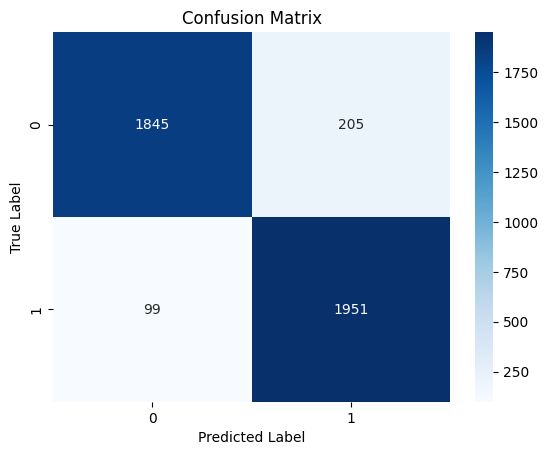

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [122]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification


In [123]:
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred)
print('Extra Trees Accuracy:', accuracy_et)

print(f'Accuracy: {accuracy_et}')
print(classification_report(y_test, y_pred))

Extra Trees Accuracy: 0.9395121951219512
Accuracy: 0.9395121951219512
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2050
           1       0.92      0.96      0.94      2050

    accuracy                           0.94      4100
   macro avg       0.94      0.94      0.94      4100
weighted avg       0.94      0.94      0.94      4100



# Test

In [125]:
df.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [148]:
import pandas as pd
import numpy as np

# Define user input as a dictionary
user_input = {'Administrative_Duration': 50,
              'Informational_Duration': 100,
              'ProductRelated_Duration': 200,
              'BounceRates': 0.05,
              'ExitRates': 0.1,
              'PageValues': 20,
              'SpecialDay': 0,
              'Month': 7,
              'OperatingSystems': 0,
              'Browser': 0,
              'Region': 0,
              'TrafficType': 1,
              'VisitorType': 'New_Visitor',
              'Weekend': 1}

# Create a DataFrame from the user input dictionary
user_df = pd.DataFrame.from_dict(user_input, orient='index').T

user_df
# Map VisitorType to binary columns
visitor_type_mapping = {
    'New_Visitor': 1,
    'Other': 0,
    'Returning_Visitor': 0
}
user_df['VisitorType_New_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Other'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Returning_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)

# Drop the original VisitorType column
user_df.drop('VisitorType', axis=1, inplace=True)

# Make a prediction for the user input
prediction = et.predict(user_df)
print(f"Prediction for customer: {"will buy" if prediction else "will NOT buy"}")




Prediction for customer: will buy


In [149]:
# Define user input as a dictionary
user_input = {'Administrative_Duration': 1000000,
              'Informational_Duration': 1000000,
              'ProductRelated_Duration': 1000000,
              'BounceRates': 5.05,
              'ExitRates': 10.1,
              'PageValues': 2,
              'SpecialDay': 0,
              'Month': 1,
              'OperatingSystems': 0,
              'Browser': 1,
              'Region': 45,
              'TrafficType': 1,
              'VisitorType': 'Returning_Visitor',
              'Weekend': 1}

# Create a DataFrame from the user input dictionary
user_df = pd.DataFrame.from_dict(user_input, orient='index').T

user_df
# Map VisitorType to binary columns
visitor_type_mapping = {
    'New_Visitor': 1,
    'Other': 0,
    'Returning_Visitor': 0
}
user_df['VisitorType_New_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Other'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Returning_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)

# Drop the original VisitorType column
user_df.drop('VisitorType', axis=1, inplace=True)

# Make a prediction for the user input
prediction = et.predict(user_df)
print(f"Prediction for customer: {"will buy" if prediction else "will NOT buy"}")
print(prediction)


Prediction for customer: will NOT buy
[0]
